<a href="https://colab.research.google.com/github/Shifatasmiah/-Bird_species_recognition/blob/main/Bird_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import keras
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

from tensorflow.keras import datasets, layers, models

from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(

     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/bird_dataset/Train',
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/bird_dataset/Val',
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/bird_dataset/Test',
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 1804 images belonging to 52 classes.
Found 602 images belonging to 52 classes.
Found 602 images belonging to 52 classes.


In [ ]:
from keras.applications.densenet import DenseNet201
base_model = DenseNet201(
    include_top=False, weights='imagenet',input_shape = (224, 224, 3)
)


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(.2)(x)
predictions = Dense(train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()







74850304/74836368 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                             

In [ ]:
r = model.fit(train, epochs=15, validation_data=(validation), validation_steps = 25)

Epoch 1/15
57/57 [==============================] - 437s 7s/step - loss: 4.1889 - accuracy: 0.0427 - val_loss: 3.6810 - val_accuracy: 0.0800
Epoch 2/15
57/57 [==============================] - 69s 1s/step - loss: 3.6822 - accuracy: 0.1064 - val_loss: 3.2572 - val_accuracy: 0.2400
Epoch 3/15
57/57 [==============================] - 69s 1s/step - loss: 3.1948 - accuracy: 0.2068 - val_loss: 2.8613 - val_accuracy: 0.2800
Epoch 4/15
57/57 [==============================] - 69s 1s/step - loss: 2.7661 - accuracy: 0.3692 - val_loss: 2.5366 - val_accuracy: 0.4000
Epoch 5/15
57/57 [==============================] - 69s 1s/step - loss: 2.3966 - accuracy: 0.5105 - val_loss: 2.1820 - val_accuracy: 0.4800
Epoch 6/15
57/57 [==============================] - 69s 1s/step - loss: 2.0331 - accuracy: 0.6425 - val_loss: 2.0659 - val_accuracy: 0.6800
Epoch 7/15
57/57 [==============================] - 69s 1s/step - loss: 1.7383 - accuracy: 0.7406 - val_loss: 1.8896 - val_accuracy: 0.6000
Epoch 8/15
57/57 [=

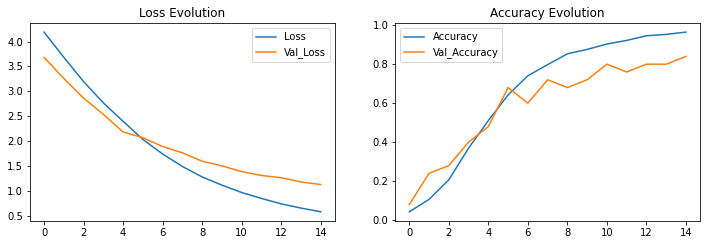

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.savefig("TL1_Graph.png")

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

602/602 [==============================] - 123s 204ms/step - loss: 0.3530 - accuracy: 0.9884
Test Accuracy: 98.84%
57/57 [==============================] - 40s 701ms/step - loss: 0.3650 - accuracy: 0.9928
Train Accuracy: 99.28%


In [ ]:
from keras.utils.np_utils import to_categorical
num_classes=len(test.class_indices)

test_labels = test.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
test_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report



pred = model.predict(test)


y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)
print(test_labels)

cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.916667,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.923077,1.000000,1.0,0.923077,1.0,0.923077,1.0,0.916667,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916667,1.0,1.0,0.990033,0.990754,0.990693
recall,1.0,1.0,1.0,1.0,1.0,0.916667,1.0,1.0,0.916667,0.916667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916667,1.000000,0.916667,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,0.909091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.990033,0.990239,0.990033
f1-score,1.0,1.0,1.0,1.0,1.0,0.956522,1.0,1.0,0.916667,0.956522,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956522,0.960000,0.956522,1.0,0.960000,1.0,0.960000,1.0,0.956522,1.0,0.952381,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956522,1.0,1.0,0.990033,0.990157,0.990021
support,12.0,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,12.000000,12.000000,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.000000,12.000000,12.000000,12.0,12.000000,12.0,12.000000,12.0,11.000000,11.0,11.000000,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.000000,11.0,11.0,0.990033,602.000000,602.000000


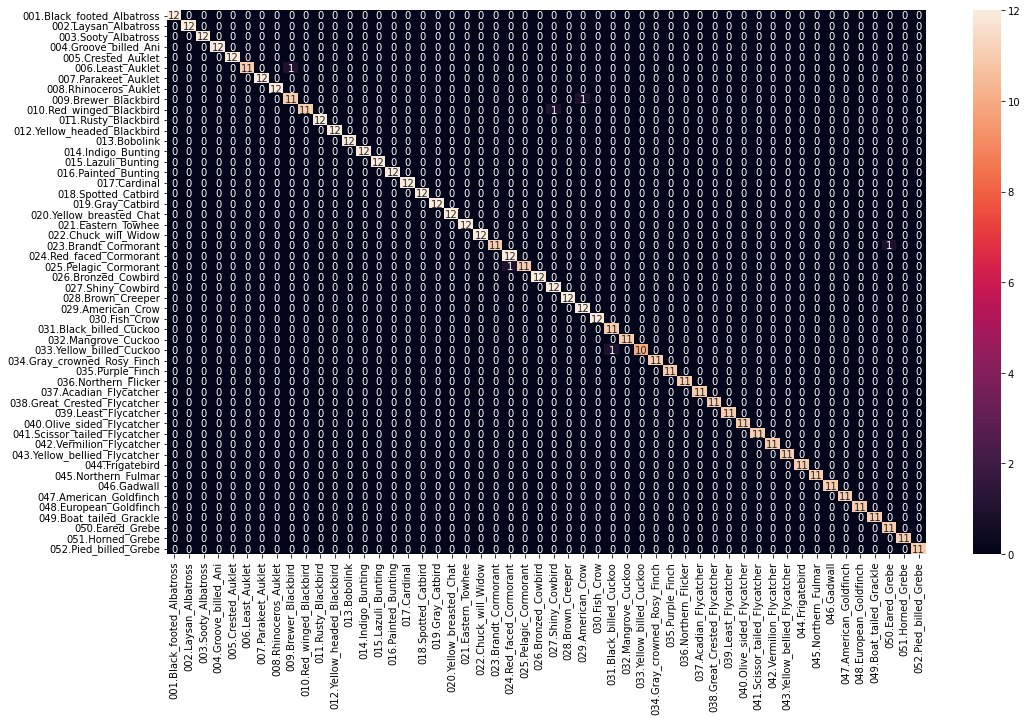

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cnf_matrix=confusion_matrix(y_test, y_pred)
classes=[ '001.Black_footed_Albatross','002.Laysan_Albatross','003.Sooty_Albatross','004.Groove_billed_Ani','005.Crested_Auklet','006.Least_Auklet','007.Parakeet_Auklet','008.Rhinoceros_Auklet','009.Brewer_Blackbird','010.Red_winged_Blackbird','011.Rusty_Blackbird','012.Yellow_headed_Blackbird','013.Bobolink','014.Indigo_Bunting','015.Lazuli_Bunting','016.Painted_Bunting','017.Cardinal','018.Spotted_Catbird','019.Gray_Catbird','020.Yellow_breasted_Chat','021.Eastern_Towhee','022.Chuck_will_Widow','023.Brandt_Cormorant','024.Red_faced_Cormorant','025.Pelagic_Cormorant','026.Bronzed_Cowbird','027.Shiny_Cowbird','028.Brown_Creeper','029.American_Crow','030.Fish_Crow','031.Black_billed_Cuckoo','032.Mangrove_Cuckoo','033.Yellow_billed_Cuckoo','034.Gray_crowned_Rosy_Finch','035.Purple_Finch','036.Northern_Flicker','037.Acadian_Flycatcher','038.Great_Crested_Flycatcher','039.Least_Flycatcher','040.Olive_sided_Flycatcher','041.Scissor_tailed_Flycatcher','042.Vermilion_Flycatcher','043.Yellow_bellied_Flycatcher','044.Frigatebird','045.Northern_Fulmar','046.Gadwall','047.American_Goldfinch','048.European_Goldfinch','049.Boat_tailed_Grackle','050.Eared_Grebe','051.Horned_Grebe','052.Pied_billed_Grebe']


df_cm = pd.DataFrame(cnf_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (17,10))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.savefig("TL1_Heatmap.png")

Following is our prediction:


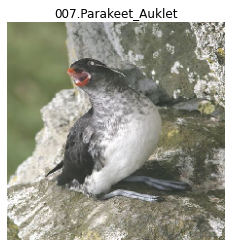

In [ ]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/bird_dataset/Test/007.Parakeet_Auklet/Parakeet_Auklet_0004_795921.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255
li=['001.Black_footed_Albatross','002.Laysan_Albatross','003.Sooty_Albatross','004.Groove_billed_Ani','005.Crested_Auklet','006.Least_Auklet','007.Parakeet_Auklet','008.Rhinoceros_Auklet','009.Brewer_Blackbird','010.Red_winged_Blackbird','011.Rusty_Blackbird','012.Yellow_headed_Blackbird','013.Bobolink','014.Indigo_Bunting','015.Lazuli_Bunting','016.Painted_Bunting','017.Cardinal','018.Spotted_Catbird','019.Gray_Catbird','020.Yellow_breasted_Chat','021.Eastern_Towhee','022.Chuck_will_Widow','023.Brandt_Cormorant','024.Red_faced_Cormorant','025.Pelagic_Cormorant','026.Bronzed_Cowbird','027.Shiny_Cowbird','028.Brown_Creeper','029.American_Crow','030.Fish_Crow','031.Black_billed_Cuckoo','032.Mangrove_Cuckoo','033.Yellow_billed_Cuckoo','034.Gray_crowned_Rosy_Finch','035.Purple_Finch','036.Northern_Flicker','037.Acadian_Flycatcher','038.Great_Crested_Flycatcher','039.Least_Flycatcher','040.Olive_sided_Flycatcher','041.Scissor_tailed_Flycatcher','042.Vermilion_Flycatcher','043.Yellow_bellied_Flycatcher','044.Frigatebird','045.Northern_Fulmar','046.Gadwall','047.American_Goldfinch','048.European_Goldfinch','049.Boat_tailed_Grackle','050.Eared_Grebe','051.Horned_Grebe','052.Pied_billed_Grebe']
print("Following is our prediction:")
prediction = model.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()


In [ ]:
model.save('TL1_model_final.h5')